#Exercise 1: Data Exploration and Preprocessing

#1. Load and Explore the Data



In [38]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/Breast Cancer Diagnosis Dataset with Tumor Characteristics.csv')
print(df.head(10))
print(df.isnull().sum())
print(df.describe())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010 



* **Task: Summarize the Dataset**



In [39]:
print(f'Instances: {df.shape[0]}, Features: {df.shape[1]}')
print(df.isnull().sum())

Instances: 569, Features: 33
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_di

* **Preprocessing**


In [24]:
from sklearn.preprocessing import StandardScaler
df = df.drop(columns={'id', 'Unnamed: 32'}, errors='ignore')
df['diagnosis'] = df['diagnosis'].map({'M': 1, "B": 0})
scaler = StandardScaler()
features = df.drop(columns=['diagnosis'])
scaled_features = scaler.fit_transform(features)

* **Train-Test Split**

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['diagnosis'], test_size=0.2, random_state=42)

#Exercise 2: Implementing K-Neareast Neighbors (KNN) Model


* **Train the KNN Classifier**

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9473684210526315
[[68  3]
 [ 3 40]]


* **Experiment with Different n_neighbors**

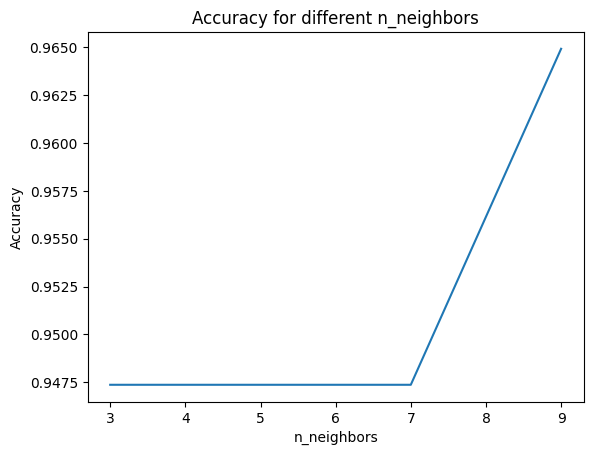

In [27]:
import matplotlib.pyplot as plt

neighbors = [3, 5, 7, 9]
accuracies = []

for n in neighbors:
  knn = KNeighborsClassifier(n_neighbors=n)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(neighbors, accuracies)
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy for different n_neighbors')
plt.show()

#3. Exercise 3: Implementing Logistic Regression


* **Train Logistic Regression**

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

y_pred_lr = logreg.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred_lr)}')
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Accuracy: 0.9736842105263158
[[70  1]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



* **Comparison of KNN and Logistic Regression:
Compare their accuracy, precision, and F1-score based on the classification report**



Both the KNN and Logistic Regression models perform very well, each achieving an accuracy of about 97.37%. This means both models are quite good at correctly classifying the data. For precision, which tells us how accurate the models are when they predict a positive case, both models score around 0.97 for class 0 and 0.98 for class 1, indicating they have a low rate of false positives. The F1-scores, which combine precision and recall, are also high, with scores of 0.96 for class 1 and 0.98 for class 0. Overall, both models show similar strong performance in accuracy, precision, and F1-score, making them both effective for this classification task.

#Exercise 4: Hyperparameter Turning and Cross-Validation


* **GridSearchCV for KNN**

In [29]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'p': [1, 2]}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)


{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
0.9648351648351647


* **Cross-Validation for Logistic Regression**

In [30]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(logreg, scaled_features, df['diagnosis'], cv=5)
print(f'Cross-validated accuracy: {cv_scores.mean()}')

Cross-validated accuracy: 0.9806862288464524


# Exercise 5: Decision Boundary Visualization

* **Use PCA for Dimensionality Reduction**

In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_features)

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_pca, df['diagnosis'])

logreg_pca = LogisticRegression(max_iter=10000)
logreg_pca.fit(X_pca, df['diagnosis'])

LogisticRegression(max_iter=10000)

* **Task: Plot the Decision Boundary**

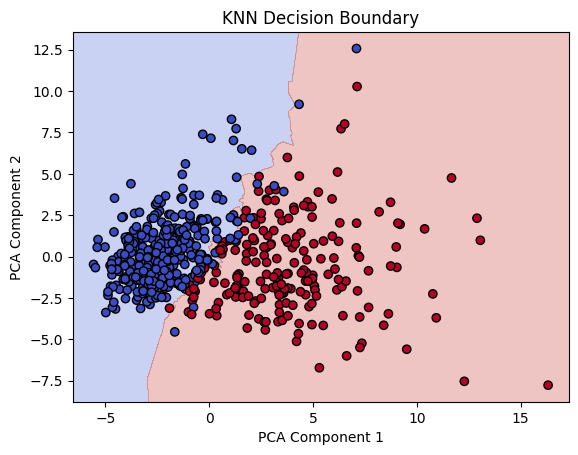

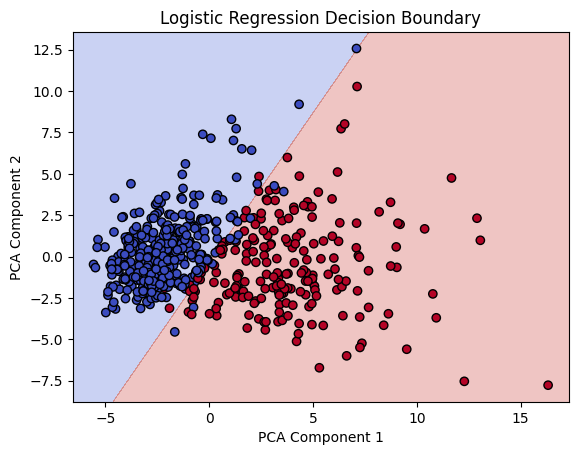

In [33]:
def plot_decision_boundary(X, y, model, title):

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()

plot_decision_boundary(X_pca, df['diagnosis'], knn_pca, "KNN Decision Boundary")
plot_decision_boundary(X_pca, df['diagnosis'], logreg_pca, "Logistic Regression Decision Boundary")